In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

# CSV dataframe 
- df to dict
- brand + item = new col

In [2]:
closet = pd.read_csv("../data/ClosetData.csv")

In [3]:
# create item name 
closet["Name"] =closet["Brand"] + " " + closet["Item"]
closet

,Item,Category,Sub-Category,Color,Pattern,Brand,Bought,Cost,2023,Price,Name
0,Turtleneck,Top,Sweater,Black,Plain,Zara,"Secondhand, Thrifted",cheap,NaN,NaN,Zara Turtleneck
1,Tank,Top,Tanktop,"Black, Red, Gold",Feather,Plisse,"Secondhand, Thrifted",cheap,NaN,NaN,Plisse Tank
2,Tank,Top,Tanktop,"Black, Tan",Leopard,Plisse,"Secondhand, Thrifted",cheap,NaN,15.0,Plisse Tank
3,Jeans,Bottom,Pants,Blue,Plain,Aerie,New,cheap,NaN,NaN,Aerie Jeans
4,Shirt,Top,Shirt,"Black, White",Cheetah,Free People,"Secondhand, Depop",cheap,NaN,NaN,Free People Shirt
...,...,...,...,...,...,...,...,...,...,...,...
79,Satin sandal,Shoes,Heel,Pink,Satin,Steve Madden,New,pricy,NaN,NaN,Steve Madden Satin sandal
80,Sandal,Shoes,Heel,"White, Gold",Plain,Karl Lagerfield,"Secondhand, Thrifted",pricy,NaN,35.0,Karl Lagerfield Sandal
81,Gold Hoops,Accessory,Jewelry,Gold,Plain,No Brand,"Secondhand, Gifted",pricy,NaN,NaN,No Brand Gold Hoops
82,Christmas Tree Hoops,Accessory,Jewelry,Gold,Plain,No Brand,"Secondhand, Thrifted",cheap,NaN,NaN,No Brand Christmas Tree Hoops


## Need to add a unique identifier to df
- for example, the only distinguisher between express body suits is color (identical otherwise)
- if I want to have the image as a vaule in the dictionary, the key identifier can be the unique identifier
    - "Express body suit" would not work
    - I'm thinking maybe category abbrev + number aka "SK1" for a skirt
- Need to clearly define categories
    - How to define shirts vs sweaters vs long sleeves? All one category or
        - would be interesting to know if a shirt is for winter or fall, which the easiest indicator is sleeve length or material...
- **simple: Tops, Bottoms, Outerwear, Accessory, Shoes otherwise too complicated**

T1, T2, T3, ..., T10


idea for subcategories:
- AC = Bags, hates, scarves, bows, knee high socks, sunglasses, etc
- DR = Dress, jumpsuit
- JE = Jewelry
- JK = Jacket, coats
- PT = Pants, shorts
- SH = Shirts, blouse, tan
- SK = skirts
- SS = Shoes
- SW = Sweater, cardigans
- WT = workout top (sports bras as shirts count here)
- WB = workout bottoms

In [4]:
# isolate one category
cat = closet.loc[closet["Category"] == "Top"]

x = len(cat)
cat

,Item,Category,Sub-Category,Color,Pattern,Brand,Bought,Cost,2023,Price,Name
0,Turtleneck,Top,Sweater,Black,Plain,Zara,"Secondhand, Thrifted",cheap,NaN,NaN,Zara Turtleneck
1,Tank,Top,Tanktop,"Black, Red, Gold",Feather,Plisse,"Secondhand, Thrifted",cheap,NaN,NaN,Plisse Tank
2,Tank,Top,Tanktop,"Black, Tan",Leopard,Plisse,"Secondhand, Thrifted",cheap,NaN,15.0,Plisse Tank
4,Shirt,Top,Shirt,"Black, White",Cheetah,Free People,"Secondhand, Depop",cheap,NaN,NaN,Free People Shirt
5,Body Suit,Top,Shirt,Black,Plain,Express,New,cheap,NaN,NaN,Express Body Suit
6,Body Suit,Top,Shirt,White,Plain,Express,New,cheap,NaN,NaN,Express Body Suit
12,Crossback Sports Bra,Top,Workout,Black,Plain,Aerie,New,Cheap,NaN,NaN,Aerie Crossback Sports Bra
13,Sports Bra,Top,Workout,White,Plain,Aerie,New,Cheap,NaN,NaN,Aerie Sports Bra
14,Sports Bra,Top,Workout,Clay,Plain,Aerie,New,Cheap,NaN,NaN,Aerie Sports Bra
15,Sports Bra,Top,Workout,Navy,Plain,Aerie,New,Cheap,NaN,NaN,Aerie Sports Bra


In [5]:
# df['id'] = df[['first', 'last']].sum(axis=1).map(hash)

# cat[["Category"]].sum(axis=1).map(hash)

In [6]:
# np.random.seed(29)

# y = len(closet)
# closet["ID"] = np.random.choice(y, size=y, replace = False)
# closet

Much better to just go in order lol less randomness

In [7]:
closet.reset_index().rename(columns = {"index" : "ID"})

,ID,Item,Category,Sub-Category,Color,Pattern,Brand,Bought,Cost,2023,Price,Name
0,0,Turtleneck,Top,Sweater,Black,Plain,Zara,"Secondhand, Thrifted",cheap,NaN,NaN,Zara Turtleneck
1,1,Tank,Top,Tanktop,"Black, Red, Gold",Feather,Plisse,"Secondhand, Thrifted",cheap,NaN,NaN,Plisse Tank
2,2,Tank,Top,Tanktop,"Black, Tan",Leopard,Plisse,"Secondhand, Thrifted",cheap,NaN,15.0,Plisse Tank
3,3,Jeans,Bottom,Pants,Blue,Plain,Aerie,New,cheap,NaN,NaN,Aerie Jeans
4,4,Shirt,Top,Shirt,"Black, White",Cheetah,Free People,"Secondhand, Depop",cheap,NaN,NaN,Free People Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,Satin sandal,Shoes,Heel,Pink,Satin,Steve Madden,New,pricy,NaN,NaN,Steve Madden Satin sandal
80,80,Sandal,Shoes,Heel,"White, Gold",Plain,Karl Lagerfield,"Secondhand, Thrifted",pricy,NaN,35.0,Karl Lagerfield Sandal
81,81,Gold Hoops,Accessory,Jewelry,Gold,Plain,No Brand,"Secondhand, Gifted",pricy,NaN,NaN,No Brand Gold Hoops
82,82,Christmas Tree Hoops,Accessory,Jewelry,Gold,Plain,No Brand,"Secondhand, Thrifted",cheap,NaN,NaN,No Brand Christmas Tree Hoops


So far we have ID + Name in df
- want to rearrange for personal brain reasonscloset = pd.read_csv("../data/ClosetData.csv")

In [57]:
def closet_df(path="../data/ClosetData.csv"):
    """
    Function to import CSV data and return df with unique identifiers. 
    
    Parameters:
    -----------
        path : str
            Path to CSV file containing closet information.
            
    Returns:
    --------
        closet : pandas.DataFrame 
            Dataframe containing 12 columns: ID, Item, Category, Subcategory, 
            Color, Pattern, Brand, Bought, Price, 2023, Cost, Name
    """
     # avoid setting with copy warning
    pd.options.mode.chained_assignment = None 
    
    closet = pd.read_csv(path)

    # create IDs per item 
    closet = closet.reset_index().rename(columns = {"index" : "ID"})
    
    # format strings to create item name
    closet["Item"] = closet["Item"].map(str.title)
    closet["Brand"] =closet["Brand"].map(str.title)
    
    # create item name 
    closet["Name"] =closet["Brand"] + " " + closet["Item"]
    
    # NaNs in 2023 addition column
    for i, value in enumerate(closet["2023"]):
        if value != "Yes":
            closet["2023"].iloc[i] = "No"

    return closet

In [58]:
df = closet_df()
df

,ID,Item,Category,Sub-Category,Color,Pattern,Brand,Bought,Cost,2023,Price,Name
0,0,Turtleneck,Top,Sweater,Black,Plain,Zara,"Secondhand, Thrifted",cheap,No,NaN,Zara Turtleneck
1,1,Tank,Top,Tanktop,"Black, Red, Gold",Feather,Plisse,"Secondhand, Thrifted",cheap,No,NaN,Plisse Tank
2,2,Tank,Top,Tanktop,"Black, Tan",Leopard,Plisse,"Secondhand, Thrifted",cheap,No,15.0,Plisse Tank
3,3,Jeans,Bottom,Pants,Blue,Plain,Aerie,New,cheap,No,NaN,Aerie Jeans
4,4,Shirt,Top,Shirt,"Black, White",Cheetah,Free People,"Secondhand, Depop",cheap,No,NaN,Free People Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,Gold Hoops,Accessory,Jewelry,Gold,Plain,No Brand,"Secondhand, Gifted",pricy,No,NaN,No Brand Gold Hoops
82,82,Christmas Tree Hoops,Accessory,Jewelry,Gold,Plain,No Brand,"Secondhand, Thrifted",cheap,No,NaN,No Brand Christmas Tree Hoops
83,83,Square Hoops,Accessory,Jewelry,Gold,Plain,Tj Maxx,New,cheap,No,NaN,Tj Maxx Square Hoops
84,84,Puffer,Outerwear,Coat,Green,Plain,Hollister,New,pricy,No,NaN,Hollister Puffer


# Split into main categories

In [51]:
df[df["Category"] == "Outerwear"]

,ID,Item,Category,Sub-Category,Color,Pattern,Brand,Bought,Cost,2023,Price,Name
11,11,Coat,Outerwear,Coat,"Black, White","Fur, Houndstooth",Zara,"Secondhand, Thrifted",Cheap,No,NaN,Zara Coat
36,36,Jacket,Outerwear,Coat,Beige,Corduroy,Sf415,"Secondhand, Thrifted",cheap,No,NaN,Sf415 Jacket
60,60,Trenchcoat,Outerwear,Coat,Beige,Plain,Merona,"Secondhand, Thrifted",cheap,No,NaN,Merona Trenchcoat
61,61,Wool Coat,Outerwear,Coat,Tan,Plain,Rachel Zoe,New,cheap,No,NaN,Rachel Zoe Wool Coat
67,67,Sport Coat,Outerwear,Coat,White,Plaid,Innovations By Izzy,"Secondhand, Thrifted",cheap,No,1.0,Innovations By Izzy Sport Coat
84,84,Puffer,Outerwear,Coat,Green,Plain,Hollister,New,pricy,No,NaN,Hollister Puffer


In [59]:
categories = ["top", "bottom", "fb", "outerwear", "acc", "shoes"]

for i in categories:
    if i != "fb" or i != "acc":
        globals()[f'{i}_df'] = df[df["Category"] == i.title()]
        
# hardcode bc running into global var issue with these two (empty df)
acc_df = df[df["Category"] == "Accessory"]
fb_df = df[df["Category"] == "Full Body"]

In [43]:
fb_df

,ID,Item,Category,Sub-Category,Color,Pattern,Brand,Bought,Cost,2023,Price,Name
51,51,Maxi Dress,Full Body,Dress,Burgundy,Plain,Pull + Bear,New,pricy,No,NaN,Pull + Bear Maxi Dress
52,52,Square-Neck Dress,Full Body,Dress,Black,Velvet,579,"Secondhand, Thrifted",cheap,No,NaN,579 Square-Neck Dress
53,53,Floral Dress,Full Body,Dress,"Black, Pink",Floral,Lulu'S,New,pricy,No,NaN,Lulu'S Floral Dress
54,54,Jumpsuit,Full Body,Jumpsuit,Black,Plain,Xhiliration,New,cheap,No,NaN,Xhiliration Jumpsuit
55,55,Maxi Dress,Full Body,Dress,"Black, White",Polka Dot,Zara,New,pricy,No,NaN,Zara Maxi Dress
56,56,Midi Dress,Full Body,Dress,Black,Plain,Wilfred,"Secondhand, Thrifted",cheap,No,NaN,Wilfred Midi Dress
57,57,Maxi Dress,Full Body,Dress,Green,Floral,American Eagle,New,cheap,No,NaN,American Eagle Maxi Dress
58,58,Jumpsuit,Full Body,Jumpsuit,"White, Green",Floral,American Eagle,New,cheap,No,NaN,American Eagle Jumpsuit
59,59,Jumpsuit,Full Body,Jumpsuit,Navy,Plain,Free People,"Secondhand, Gifted",cheap,No,NaN,Free People Jumpsuit
62,62,Dress,Full Body,Dress,Black,Glitter,Cdc,"Secondhand, Thrifted",cheap,No,NaN,Cdc Dress


## Now we have six distinct datasets
- to be used for google form response (copy paste per category)
- to be used to category 

In [60]:
def closet_cat(df):
    """
    Function to parse closet df into five distinct datasets
    1) Tops
    2) Bottoms
    3) Full Body
    4) Accessories
    5) Shoes
    6) Outerwear
    
    Parameters:
    -----------
        df : pandas.DataFrame
            Dataframe obtained from closet_df function
            
    Returns:
    --------
        acc_df : pandas.DataFrame 
            Dataframe containing only accessory data.
            
        bottom_df : pandas.DataFrame 
            Dataframe containing only bottom data.
            
        fb_df : pandas.DataFrame 
            Dataframe containing only full-body data.
            
        out_df : pandas.DataFrame 
            Dataframe containing only outerwear data.
            
        shoes_df : pandas.DataFrame 
            Dataframe containing only shoe data.
            
        top_df : pandas.DataFrame 
            Dataframe containing only top data.
            
    """
    categories = ["top", "bottom", "fb", "outerwear", "acc", "shoes"]

    for i in categories:
        if i != "fb" or i != "acc":
            globals()[f'{i}_df'] = df[df["Category"] == i.title()]

    # hardcode bc running into global var issue with these two (empty df)
    acc_df = df[df["Category"] == "Accessory"]
    fb_df = df[df["Category"] == "Full Body"]
    out_df = df[df["Category"] == "Outerwear"]
    
    return acc_df, bottom_df, fb_df, out_df, shoes_df, top_df

In [61]:
acc_df, bottom_df, fb_df, out_df, shoes_df, top_df = closet_cat(closet_df)

In [63]:
# Run for google response form 

# top_df.to_csv(path_or_buf="../data/top_df.csv")
# bottom_df.to_csv(path_or_buf="../data/bottom_df.csv")
# acc_df.to_csv(path_or_buf="../data/acc_df.csv")
# fb_df.to_csv(path_or_buf="../data/fb_df.csv")
# shoes_df.to_csv(path_or_buf="../data/shoes_df.csv")
# out_df.to_csv(path_or_buf="../data/out_df.csv")

## Function for Google Form Data 
- melt data into (date, item)
- second function to count how many times a single item occurs

# Image Dictionary

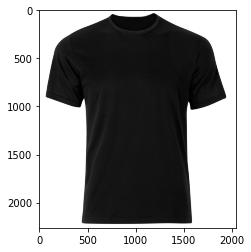

In [13]:
tshirt = plt.imread("black-shirt.png")
plt.imshow(tshirt);

In [14]:
type(tshirt)

numpy.ndarray

Can't use arrays in pandas bc object, maybe better off using a dictionary to store everything? 
- then work with pd df without image 
- also need to write function to extract and store all images into a dictionary
    - function will need to give each item will a unique identifier

In [15]:
img_dict = dict()

In [16]:
img_dict['shirt1'] = tshirt

In [17]:
img_dict

{'shirt1': array([[[1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         ...,
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.]],
 
        [[1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         ...,
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.]],
 
        [[1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         ...,
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.]],
 
        ...,
 
        [[1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         ...,
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.]],
 
        [[1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         ...,
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.]],
 
        [[1., 1., 1., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 0.],

# Notes to self:
- Pricing schema
    - `$ less than or equal to $25`
     - `$$ $26 - $50`
    - `$$$ $50 - $100`
    - `$$$$ $100 +`
